# Importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import pandas as pd
import os
import time

# Reading the band images 

In [4]:
dataset_path = "/home/biswajitrana/Documents/2nd_semester/RKMVERI_2ND/class/ML/SS_assignments_4/"
dataset_dir = os.listdir(dataset_path)

In [5]:
image_arr1 = np.ndarray(shape = (512,512,4),dtype = np.int64)
for i in range(4):
    img = plt.imread(dataset_path + 'band' + str(i+1)+ '.gif')
    image_arr1[:,:,i] = np.array(img[:,:,0])

In [6]:
print(image_arr1.shape)
image_arr1[[0,1],[0,1],:]

(512, 512, 4)


array([[41, 27, 26, 42],
       [42, 27, 27, 43]])

In [7]:
image_arr=image_arr1.reshape(512*512,4)

In [8]:
image_arr.shape

(262144, 4)

# Implementing K-Means clustering

In [9]:
C=np.zeros((2,4))
for i in range(2):
    C[i]=np.random.randint(0,80,4)
print(C)

[[ 7.  2. 71.  4.]
 [75. 64. 41. 59.]]


#### K-means

In [10]:
def k_means(k, X, error):
    C = X[np.random.choice(X.shape[0], k, replace=False)]
    all_centroids = [C.copy()]
    flag = True
    while flag:
        dist = np.sqrt(((X[:, np.newaxis] - C) ** 2).sum(axis=2))
        label = np.argmin(dist, axis=1)
        new_centroids = np.array([X[label == i].mean(axis=0) for i in range(k)])
        all_centroids.append(new_centroids)
        if np.sum(np.abs(all_centroids[-1] - all_centroids[-2])) < error:
            flag = False
        else:
            C = new_centroids.copy()
    
    return all_centroids, label

#### Plot

In [11]:
def plot(label):
    plt.imshow(label, cmap="magma")
    plt.colorbar()
    plt.show()

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 For K =  2 


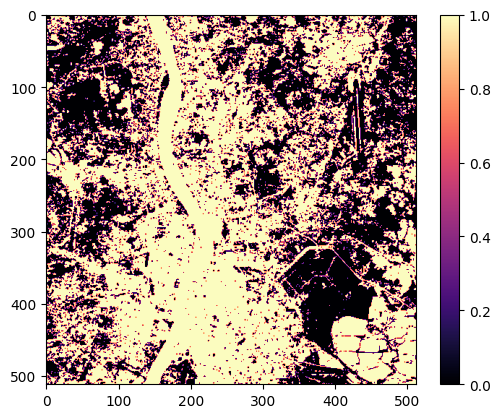

 Time taken =  0.3082144260406494 
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
------------------------------------------------------------------------------------------------------------------------------------------------------
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 For K =  3 


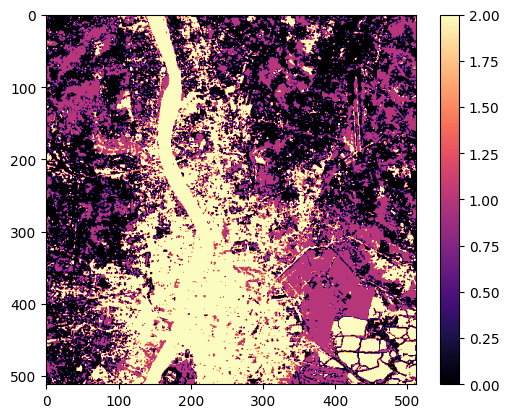

 Time taken =  0.7462646961212158 
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
------------------------------------------------------------------------------------------------------------------------------------------------------
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 For K =  4 


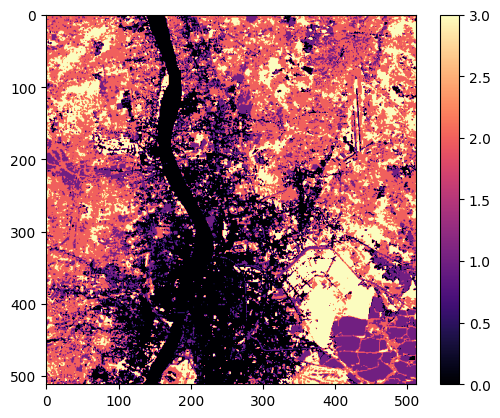

 Time taken =  1.6868457794189453 
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
------------------------------------------------------------------------------------------------------------------------------------------------------
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 For K =  5 


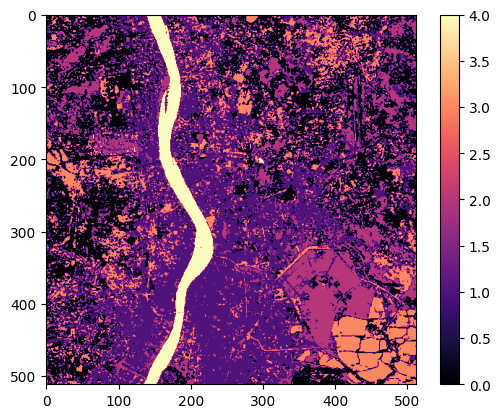

 Time taken =  1.0313477516174316 
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
------------------------------------------------------------------------------------------------------------------------------------------------------
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 For K =  6 


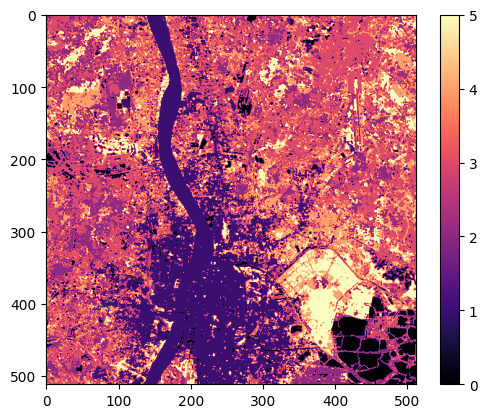

 Time taken =  2.8523850440979004 
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
------------------------------------------------------------------------------------------------------------------------------------------------------


In [39]:
K=[2,3,4,5,6]
err=0.01
for k in K:
    s=time.time()
    l=k_means(k,image_arr,err)
    label=l[1]
    # print(label)
    label=label.reshape(512,512)
    print("|||"*50)
    print("\033[1m" , "For K = ",k, "\033[0m")
    plot(label)
    e=time.time()
    print("\033[1m" , "Time taken = ",e-s, "\033[0m")
    print("|||"*50)
    print("---"*50)

# For k=2

In [40]:
l=k_means(2,image_arr,err)

In [41]:
print(l)

([array([[40, 26, 28, 34],
       [43, 27, 28, 31]]), array([[39.96836203, 25.35520409, 25.93009363, 36.52250856],
       [41.86086489, 26.42761214, 27.68565136, 28.26688155]]), array([[40.39759187, 25.74853416, 26.35270632, 37.23995882],
       [41.01620807, 25.71649976, 26.86425863, 27.94032086]]), array([[40.71294618, 26.0582993 , 26.80597669, 37.64177043],
       [40.54224222, 25.30087218, 26.21248846, 28.12393442]]), array([[40.93127153, 26.280307  , 27.1307882 , 37.95733704],
       [40.30108726, 25.10137312, 25.88030205, 28.5014293 ]]), array([[41.09069558, 26.44596401, 27.36458719, 38.23910105],
       [40.18053853, 25.01120079, 25.72536096, 28.84688143]]), array([[41.21448301, 26.57702133, 27.54612658, 38.47538   ],
       [40.11484512, 24.96628434, 25.64493717, 29.12174167]]), array([[41.30618416, 26.67646543, 27.68425098, 38.66380139],
       [40.08066135, 24.94552603, 25.60299786, 29.32817777]]), array([[41.37365246, 26.74775374, 27.78195047, 38.795605  ],
       [40.059479

In [42]:
label=l[1]
print(label)
label=label.reshape(512,512)


[0 0 0 ... 1 1 1]


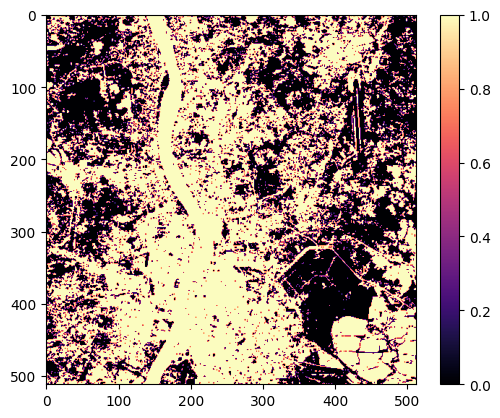

In [43]:
plot(label)

# For k=3

In [44]:
l3=k_means(3,image_arr,err)

In [45]:
print(l3)

([array([[39, 24, 28, 26],
       [44, 30, 31, 21],
       [41, 26, 28, 37]]), array([[39.75316824, 24.41977422, 25.11898519, 28.0703933 ],
       [44.10136229, 29.98942555, 31.35448223, 22.06401829],
       [40.85742052, 26.11276268, 26.95378898, 36.99314692]]), array([[39.62712029, 24.35643085, 24.8893528 , 29.00524078],
       [44.0817086 , 29.76506755, 31.45417037, 23.18687808],
       [41.06369666, 26.36784393, 27.31217845, 37.69920302]]), array([[39.5336525 , 24.32384019, 24.77799432, 29.66150913],
       [43.96895414, 29.37636634, 31.34667874, 24.48218097],
       [41.25534709, 26.59373737, 27.6058616 , 38.29034414]]), array([[39.39927844, 24.24969133, 24.61010182, 30.13154814],
       [43.73588634, 28.81675762, 30.9699379 , 25.84879563],
       [41.40643778, 26.76816061, 27.83193581, 38.72323904]]), array([[39.20608157, 24.12693847, 24.33407334, 30.53214176],
       [43.3110578 , 28.11581805, 30.36942454, 27.00830203],
       [41.50357333, 26.88688658, 27.98299749, 39.06682361]

In [46]:
label3=l3[1]
print(label)
label3=label3.reshape(512,512)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


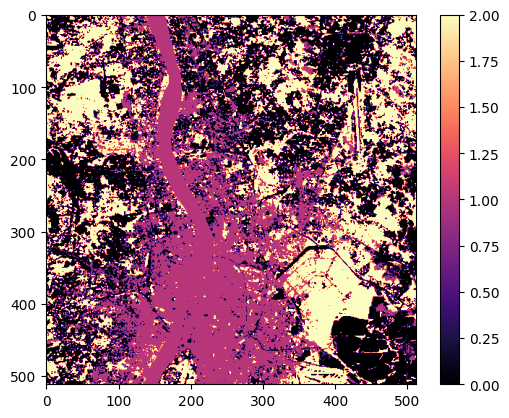

In [47]:
plot(label3)

# For k=4

In [48]:
l4=k_means(4,image_arr,err)

In [49]:
print(l4)

([array([[47, 30, 32, 36],
       [43, 26, 29, 35],
       [40, 24, 25, 25],
       [39, 25, 23, 41]]), array([[45.5745497 , 30.62133089, 33.62441628, 39.20338559],
       [41.203306  , 26.16268967, 27.68914178, 34.08679026],
       [39.84513829, 24.72609836, 25.12608027, 26.916601  ],
       [38.85360134, 24.44631092, 23.83386775, 38.91173327]]), array([[44.88017803, 30.11410948, 32.98415925, 40.20887362],
       [41.22796132, 26.14898893, 27.64135776, 33.56538575],
       [39.93626183, 24.78791739, 25.23131999, 26.90629738],
       [38.87936223, 24.43362527, 23.92132645, 38.65448013]]), array([[44.53101955, 29.8140396 , 32.51413688, 40.39693099],
       [41.2657911 , 26.13644673, 27.65525633, 33.15636825],
       [39.92273651, 24.78149901, 25.19962297, 26.73066742],
       [38.85801937, 24.40019255, 23.91917407, 38.3853062 ]]), array([[44.31173972, 29.61082377, 32.19295559, 40.40356555],
       [41.2882377 , 26.1150429 , 27.66907945, 32.79628743],
       [39.90461561, 24.77710948, 25

In [50]:
label4=l4[1]
print(label)
label4=label4.reshape(512,512)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


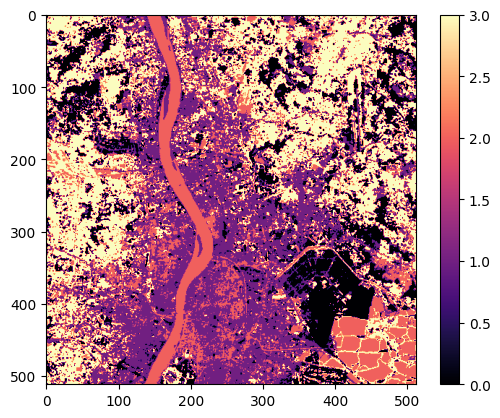

In [51]:
plot(label4)

# For k=5

In [52]:
l5=k_means(5,image_arr,err)

In [53]:
print(l5)

([array([[43, 28, 30, 33],
       [45, 30, 32, 44],
       [42, 27, 28, 28],
       [37, 23, 22, 33],
       [45, 28, 30, 30]]), array([[41.85229222, 26.91270753, 28.64893174, 35.36232536],
       [43.22929844, 28.73217084, 30.40889572, 42.79283932],
       [41.2710797 , 25.9352022 , 27.31290145, 27.23792697],
       [38.302322  , 23.62474057, 23.09683551, 33.66405014],
       [44.47251586, 28.58517064, 30.98504983, 29.66263969]]), array([[41.35641017, 26.50519563, 27.94645661, 35.85746266],
       [43.07842709, 28.58981211, 30.19587685, 42.72247825],
       [40.49799853, 25.11226566, 26.11550137, 26.80790913],
       [38.38938799, 23.68322108, 23.21297804, 34.05167789],
       [44.01390258, 28.79008085, 31.21159535, 28.50892329]]), array([[41.20166662, 26.3689167 , 27.69338001, 35.96041015],
       [43.20666081, 28.70369557, 30.38910549, 42.63826808],
       [39.91393192, 24.47162792, 25.17610074, 27.12449133],
       [38.351336  , 23.66784219, 23.17585291, 34.37147838],
       [43.66

In [54]:
label5=l5[1]
print(label)
label5=label5.reshape(512,512)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


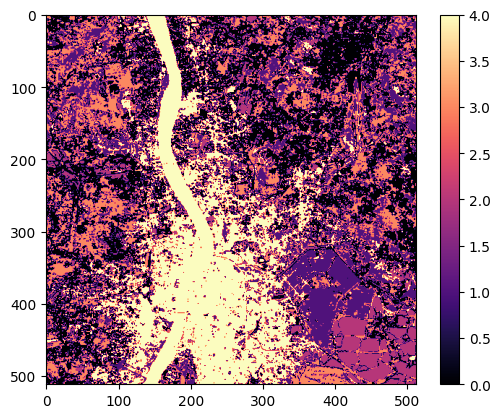

In [55]:
plot(label5)

# For k=6

In [56]:
l6=k_means(6,image_arr,err)

In [57]:
print(l6)

([array([[37, 23, 19, 20],
       [41, 27, 29, 40],
       [42, 27, 29, 30],
       [45, 29, 31, 35],
       [38, 23, 25, 31],
       [39, 25, 24, 31]]), array([[36.85158416, 21.92168317, 19.65138614, 21.14554455],
       [40.77643389, 26.36689621, 27.09999706, 40.44370383],
       [42.17640651, 26.82948866, 28.80009291, 28.60189991],
       [45.13977301, 29.93872851, 32.82523234, 36.93885188],
       [37.78255229, 23.06829214, 23.71857734, 32.40310927],
       [39.71813432, 24.68036478, 24.01763085, 32.51171274]]), array([[36.99572723, 22.0389677 , 19.97154333, 21.81985985],
       [40.48856678, 26.06279464, 26.52099586, 40.45138994],
       [42.1260225 , 26.74283073, 28.71080014, 28.15480929],
       [45.0250225 , 30.08468047, 33.18063006, 38.41911791],
       [37.48808858, 22.91470982, 22.60715416, 32.97788052],
       [40.03219205, 24.95666455, 25.16704786, 33.02185689]]), array([[37.08521104, 22.11948588, 20.15963186, 22.15756903],
       [40.32004164, 25.91271764, 26.21305829, 40

In [58]:
label6=l6[1]
print(label)
label6=label6.reshape(512,512)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


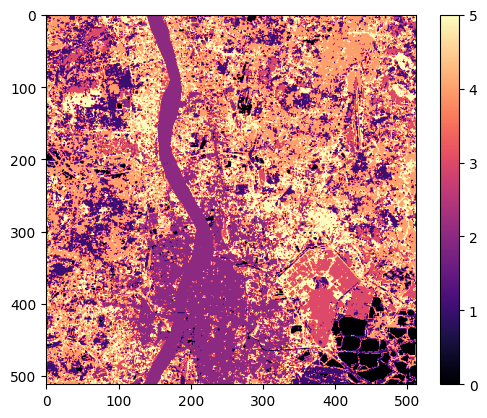

In [59]:
plot(label6)